In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 2px  black solid !important;
    padding: 2px  black solid !important;
    margin: 2px  black solid !important;
  color: black !important;
}
</style>

In [2]:
# import moduels
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

## Take a look at the Data

a. Read in the dataset and take a look at the top few rows 

In [3]:
# loading dataset
url = 'Downloads/data/infraction statistics/toy_dataset.csv'
df = pd.read_csv(url , sep=',' , encoding='utf8')
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
# get information on dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [5]:
# name columns is lower
df.columns = [x.lower() for x in df.columns]
# test
list(df.columns)

['number', 'city', 'gender', 'age', 'income', 'illness']

b. Use the below cell to find the number of rows in the dataset.

In [6]:
# count rows and columns
df.shape

(150000, 6)

c. Make sure that the number of persons are unique using `Number` column.

In [7]:
# duplicate know
df['number'].duplicated().sum()

0

d. check the unique values for city, gender

In [8]:
df['city'].value_counts()

New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: city, dtype: int64

In [11]:
list(df['gender'].unique())

['Male', 'Female']

e. See the distributions of `Income`, and `Age` variables.

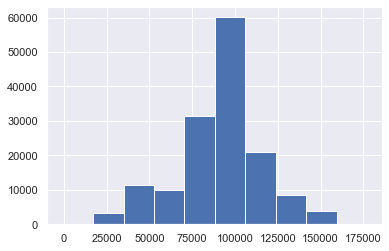

In [12]:
plt.hist(df['income']);

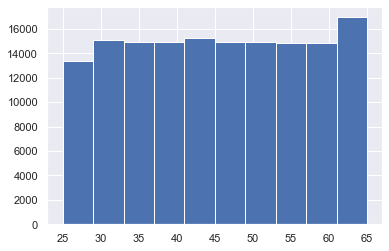

In [16]:
plt.hist(df['age']);

f. check the missing values in the dataset.

In [18]:
df.isna().all()

number     False
city       False
gender     False
age        False
income     False
illness    False
dtype: bool

## Probability

> __a. The proportion of persons that are ill,  and the proportion of persons that are not ill.__

In [19]:
count_illness = df.groupby('illness')['illness'].count()
print(count_illness , '\n','='*40,'\n')
print('proportion of persons that are ill : ',(count_illness[0]/count_illness.sum())*100 ,'%' )
print('proportion of persons that are not ill : ',(count_illness[1]/count_illness.sum())*100 ,'%' )

illness
No     137861
Yes     12139
Name: illness, dtype: int64 

proportion of persons that are ill :  91.90733333333333 %
proportion of persons that are not ill :  8.092666666666666 %


> __b. The proportion of persons that are `male`.__

In [20]:
count_gender = df.groupby('gender')['gender'].count()
print(count_gender , '\n','='*40,'\n')
print('proportion of Female : ',(count_gender[0]/count_gender.sum())*100 ,'%' )
print('proportion of Male : ',(count_gender[1]/count_gender.sum())*100 ,'%' )

gender
Female    66200
Male      83800
Name: gender, dtype: int64 

proportion of Female :  44.13333333333333 %
proportion of Male :  55.86666666666667 %


> __c. The proportion of persons that are from `Boston`__

In [21]:
print('Count of persons that are from Boston : ', df.query('city=="Boston"')['number'].count())
print('Count of persons : ', df['city'].count())
print('Proportion of persons that are from Boston : ', (df.query('city=="Boston"')['number'].count()/df['city'].count())*100 , '%')

Count of persons that are from Boston :  8301
Count of persons :  150000
Proportion of persons that are from Boston :  5.534 %


> __d. The proportion of persons that have `income` from `50000` to `100000`__

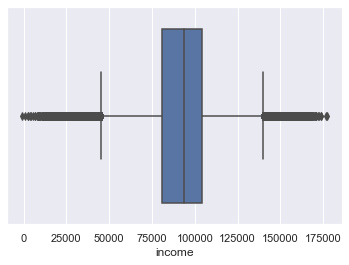

In [16]:
sns.boxplot(df['income']);

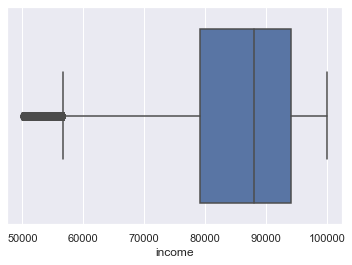

In [22]:
sns.boxplot(df[(df['income']>=50000) & (df['income']<=100000)]['income']);

In [18]:
print(' proportion of persons that have income from 50000 to 100000 : ',len(df[(df['income']>=50000) & (df['income']<=100000)]['income'])/len(df['income'])*100 , '%')

 proportion of persons that have income from 50000 to 100000 :  56.596666666666664 %


## Conditional Probability

> __a. Given that a person was in the `New York City` , what is the probability that he is ill?__

In [23]:
df.illness.value_counts()

No     137861
Yes     12139
Name: illness, dtype: int64

In [24]:
# create column [patients] To get the proportion
def class_new(illness):
    if illness == 'No':
        return False
    else:
        return True
df['patients'] = df['illness'].apply(class_new)

In [25]:
# test
df.patients.value_counts()

False    137861
True      12139
Name: patients, dtype: int64

In [26]:
(df.query('city=="New York City"')['patients']).mean()

0.07992923450016896

> __b. Given that a person is `Male` , what is the probability that he is ill?__

In [27]:
(df.query('gender=="Male"')['patients']).mean()

0.08124105011933175

> __c. Given that a person is `Female` , what is the probability that she is ill?__

In [28]:
(df.query('gender=="Female"')['patients']).mean()

0.08052870090634441

> __d. Given that a person is male and from Dallas, what is the probability that he is ill__

In [29]:
(df.query('gender=="Male" and city=="Dallas"')['patients']).mean()

0.08225777131430649

## Bayes rule

$$ P(A/B) = \frac{P(B/A) * P(A)}{P(B)} $$

                                          

> __a. What is the probability that a person is from `Boston` given this person is ill__

* __P(Boston|Ill) = P(Boston).P(Ill/Boston) / P(ILL)__

In [30]:
(df.query('patients')['city']=='Boston').mean()

0.056512068539418404

> __b. What is the probability that a person is female, given this person is ill__

* __P(femal|Ill) = P(female).P(Ill/female) / P(ILL)__

In [31]:
(df.query('patients')['gender']=='Female').mean()

0.43916302825603426

> __c. What is the probability that a person is Male, given this person is ill__

In [32]:
1-(df.query('patients')['gender']=='Female').mean()

0.5608369717439657

## Descriptive Statistics

> __a. describe the `Gender` variable, and `City` variable.__

In [33]:
df.groupby(['gender', 'city'])['gender'].count()

gender  city           
Female  Austin              5385
        Boston              3715
        Dallas              8705
        Los Angeles        14285
        Mountain View       6276
        New York City      22172
        San Diego           2098
        Washington D.C.     3564
Male    Austin              6907
        Boston              4586
        Dallas             11002
        Los Angeles        17888
        Mountain View       7943
        New York City      28135
        San Diego           2783
        Washington D.C.     4556
Name: gender, dtype: int64

> __b. Use what you learnt about descriptive statistics to describe the `Age` variable, based on `City` variable.__

In [30]:
df.groupby('city')['age'].mean()

city
Austin             44.651237
Boston             45.197807
Dallas             45.058761
Los Angeles        44.994094
Mountain View      44.992756
New York City      44.922118
San Diego          44.965171
Washington D.C.    44.802709
Name: age, dtype: float64

> __c. Use what you learnt about descriptive statistics to describe the `Age` variable, based on `Gender` variable.__ 

In [31]:
df.groupby('gender')['age'].mean()

gender
Female    44.997764
Male      44.912625
Name: age, dtype: float64

> __d. is there a diffrence between the distributions of ill, and not ill persons in terms of `Age` variable__

In [32]:
df.groupby('patients')['age'].mean()

patients
False    44.943980
True     45.020842
Name: age, dtype: float64

* Hint(you can use describe function ,  histograms, or bar chart ) for these three questions

>__e. Repeat the last three questions in terms of `Income` instead of `Age`__

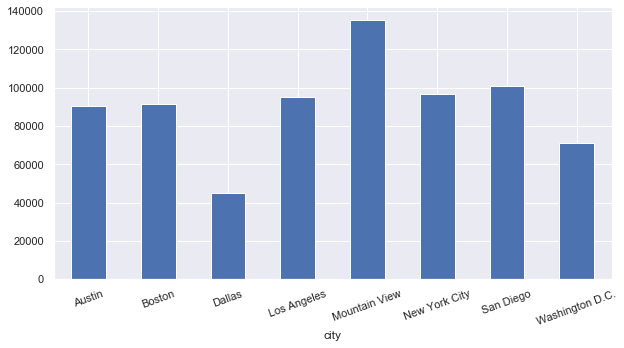

In [49]:
# plot the income variable, based on City variable.
plt.figure(figsize=[10,5])
df.groupby('city')['income'].mean().plot(kind='bar')
plt.xticks(rotation=20);

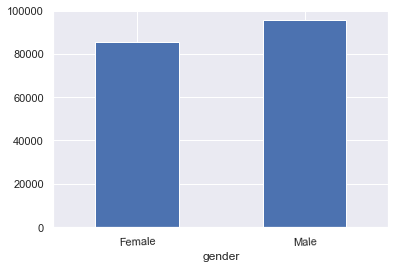

In [42]:
# # plot the income variable, based on gender variable.
df.groupby('gender')['income'].mean().plot(kind='bar')
plt.xticks(rotation=2);

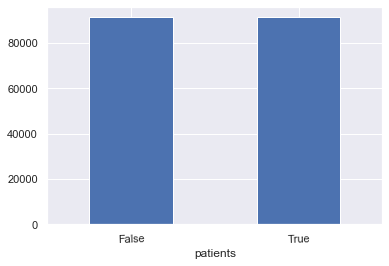

In [43]:
# plot the income variable, based on patients variable.
df.groupby('patients')['income'].mean().plot(kind='bar')
plt.xticks(rotation=2);